In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from preprocessing.preprocess_ucr import UCRDatasetImporter
from preprocessing.preprocess_ucr import UCRDataset
from preprocessing.preprocess_ucr import AugUCRDataset
from preprocessing.data_pipeline import build_data_pipeline
from utils import (
    load_yaml_param_settings,
    get_root_dir,
    model_filename,
)
from examine_data import Examiner
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [102]:
# ['SonyAIBORobotSurface1', 'SonyAIBORobotSurface2', 'Symbols','Mallat']
UCR_SUBSET = [
    "ElectricDevices",
    "StarLightCurves",
    "Wafer",
    "ECG5000",
    "TwoPatterns",
    "FordA",
    "UWaveGestureLibraryAll",
    "FordB",
    "ShapesAll",
    'SonyAIBORobotSurface1', 
    'SonyAIBORobotSurface2', 
    'Symbols',
    'Mallat'
]

dataset_name = "ECG5000"
examiner_vq = Examiner(datasets=[dataset_name])
examiner_bt = Examiner(datasets=[dataset_name])
examiner_vib = Examiner(datasets=[dataset_name])


self.X_train.shape: (500, 140)
self.X_test.shape: (4500, 140)
# unique labels (train): [0 1 2 3 4]
# unique labels (test): [0 1 2 3 4]
self.X_train.shape: (500, 140)
self.X_test.shape: (4500, 140)
# unique labels (train): [0 1 2 3 4]
# unique labels (test): [0 1 2 3 4]
self.X_train.shape: (500, 140)
self.X_test.shape: (4500, 140)
# unique labels (train): [0 1 2 3 4]
# unique labels (test): [0 1 2 3 4]


In [103]:
examiner_vq.load_models(dataset=dataset_name)
examiner_bt.load_models(dataset=dataset_name, ssl_method="barlowtwins")
examiner_vib.load_models(dataset=dataset_name, ssl_method="vibcreg")

/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
encoder-seed-1-Y3A7B9-ECG5000.ckpt
 encoder loaded
/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
decoder-seed-1-Y3A7B9-ECG5000.ckpt
 decoder loaded
/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
vqmodel-seed-1-Y3A7B9-ECG5000.ckpt
 vqmodel loaded
maskgit-seed-1-Y3A7B9-ECG5000.ckpt
maskgit loaded
/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
barlowtwins-encoder-seed-1-DQZWZT-ECG5000.ckpt
barlowtwins encoder loaded
/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
barlowtwins-decoder-seed-1-DQZWZT-ECG5000.ckpt
barlowtwins decoder loaded
/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/saved_models
barlowtwins-vqmodel-seed-1-DQZWZT-ECG5000.ckpt
barlowtwins vq

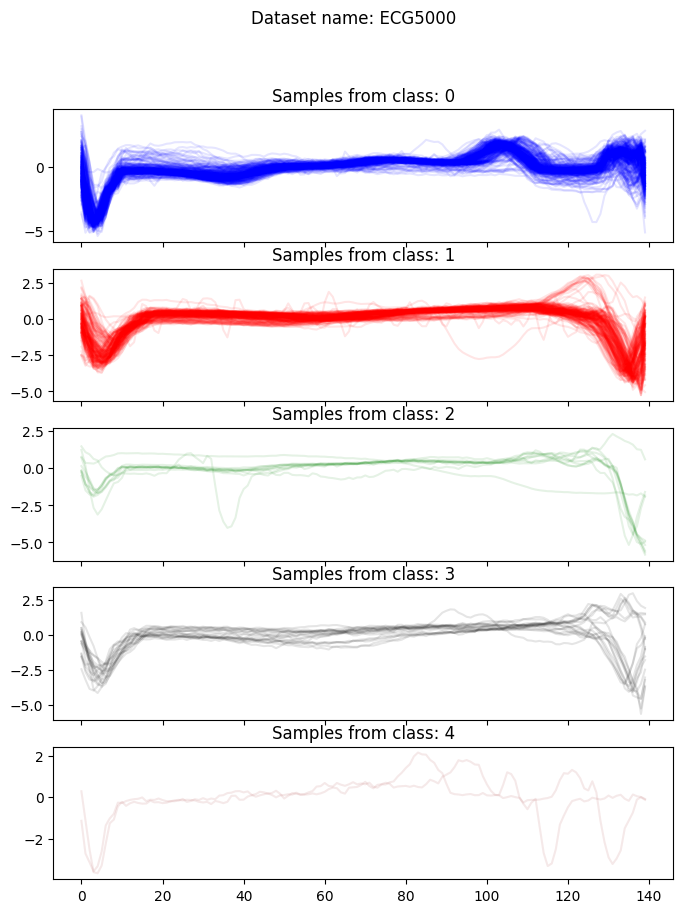

In [104]:
examiner_vq.plot_datasets()

In [105]:
X_train = examiner_vq.loader_dict[dataset_name][0].dataset.X

In [106]:
def sample_indices(array, sample_size):
    if sample_size > len(array):
        sample_size = len(array)
    return np.random.choice(len(array), size=sample_size, replace=False)


In [107]:
Y_train = examiner_vq.loader_dict[dataset_name][0].dataset.Y
labels = np.unique(Y_train)
n_samples = 20
labels

x_new_vib = examiner_vib.generate_samples(n_samples)
x_new_bt =  examiner_bt.generate_samples(n_samples)
x_new_vq =  examiner_vq.generate_samples(n_samples)

x_new_vib_cond = []
x_new_bt_cond = []
x_new_vq_cond = []

for i in labels:
    x_new_vib_cond.append(examiner_vib.generate_samples(n_samples, i))
    x_new_bt_cond.append(examiner_bt.generate_samples(n_samples, i))
    x_new_vq_cond.append(examiner_vq.generate_samples(n_samples, i))

100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


In [108]:

def plot_new(ax, x_new, color = "red", alpha = 0.1):
    # nr_of_samples = x_new.shape[0]
    for x in x_new:
        ax.plot(x, color = color, alpha = alpha) 
    return ax

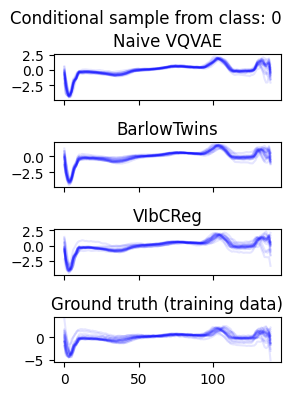

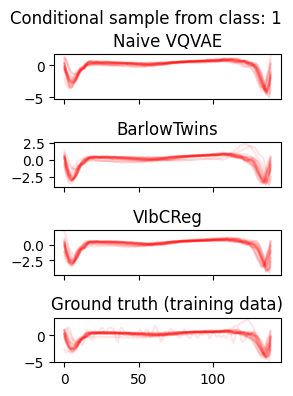

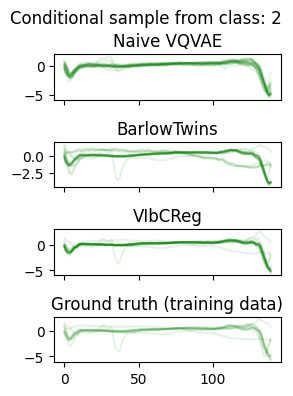

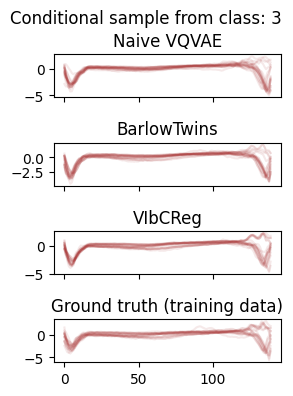

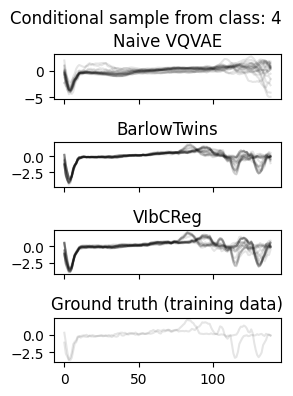

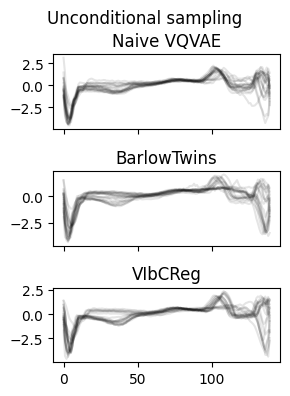

In [109]:
colors = ['blue','red', 'green', 'brown','black', 'purple'] #, 'brown', 'pink'


for i in labels:
    f, a = plt.subplots(4, 1, figsize=(3, 4), sharex='col', sharey='row')
    a[0].set_title("Naive VQVAE")
    a[0] = plot_new(a[0], x_new_vq_cond[i], color= colors[i%len(colors)])

    a[1].set_title("BarlowTwins")
    a[1] = plot_new(a[1], x_new_bt_cond[i], color= colors[i%len(colors)])

    a[2].set_title("VIbCReg")
    a[2] = plot_new(a[2], x_new_vib_cond[i], color= colors[i%len(colors)])
    
    mask = np.squeeze(Y_train == i)
    x_conditional = X_train[mask, :]
    x_conditional = x_conditional[sample_indices(x_conditional, n_samples)]
    a[3].set_title("Ground truth (training data)")
    a[3] = plot_new(a[3], x_conditional, color= colors[i%len(colors)])

    plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    f.suptitle(f"Conditional sample from class: {i}", fontsize=12)
    plt.savefig(f"visual_inspection/{dataset_name}/{dataset_name}-conditional-class{i}.pdf")

    plt.show()


f, a = plt.subplots(3, 1, figsize=(3, 4), sharex='col', sharey='row')
a[0].set_title("Naive VQVAE")
a[0] = plot_new(a[0], x_new_vq, color= "black")

a[1].set_title("BarlowTwins")
a[1] = plot_new(a[1], x_new_bt, color= "black")

a[2].set_title("VIbCReg")
a[2] = plot_new(a[2], x_new_vib, color= "black")

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
f.suptitle("Unconditional sampling", fontsize=12)
plt.savefig(f"visual_inspection/{dataset_name}/{dataset_name}-unconditional.pdf")
plt.show()